# Lab 8: Define and Solve an ML Problem of Your Choosing

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [2]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")


df = pd.read_csv(airbnbDataSet_filename)

display(df.head())

,name,description,neighborhood_overview,host_name,host_location,host_about,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,...,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,n_host_verifications
0,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,Jennifer,"New York, New York, United States",A New Yorker since 2000! My passion is creatin...,0.80,0.17,True,8.0,...,4.79,4.86,4.41,False,3,3,0,0,0.33,9
1,"Whole flr w/private bdrm, bath & kitchen(pls r...","Enjoy 500 s.f. top floor in 1899 brownstone, w...",Just the right mix of urban center and local n...,LisaRoxanne,"New York, New York, United States",Laid-back Native New Yorker (formerly bi-coast...,0.09,0.69,True,1.0,...,4.80,4.71,4.64,False,1,1,0,0,4.86,6
2,"Spacious Brooklyn Duplex, Patio + Garden",We welcome you to stay in our lovely 2 br dupl...,NaN,Rebecca,"Brooklyn, New York, United States","Rebecca is an artist/designer, and Henoch is i...",1.00,0.25,True,1.0,...,5.00,4.50,5.00,False,1,1,0,0,0.02,3
3,Large Furnished Room Near B'way,Please don’t expect the luxury here just a bas...,"Theater district, many restaurants around here.",Shunichi,"New York, New York, United States",I used to work for a financial industry but no...,1.00,1.00,True,1.0,...,4.42,4.87,4.36,False,1,0,1,0,3.68,4
4,Cozy Clean Guest Room - Family Apt,"Our best guests are seeking a safe, clean, spa...",Our neighborhood is full of restaurants and ca...,MaryEllen,"New York, New York, United States",Welcome to family life with my oldest two away...,NaN,NaN,True,1.0,...,4.95,4.94,4.92,False,1,0,1,0,0.87,7


In [3]:
df.dtypes

name                                             object
description                                      object
neighborhood_overview                            object
host_name                                        object
host_location                                    object
host_about                                       object
host_response_rate                              float64
host_acceptance_rate                            float64
host_is_superhost                                  bool
host_listings_count                             float64
host_total_listings_count                       float64
host_has_profile_pic                               bool
host_identity_verified                             bool
neighbourhood_group_cleansed                     object
room_type                                        object
accommodates                                      int64
bathrooms                                       float64
bedrooms                                        

## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

The data set I have chosen for this project is the AirBnb data set. I will be using this data set to predict an on-market price suggestion for an AirBnb listing. The label will be 'price' and the features are all columns relating to the home or apartment's physical features, and amenities. This is a supervised learning problem and is a regression problem. This model could be helpful for people considering renting out their property because it can give an accurate market valuation for their property at listing time.

## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [4]:
# YOUR CODE HERE
display(df.shape)
display(df.describe(include='all'))

(28022, 50)

,name,description,neighborhood_overview,host_name,host_location,host_about,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,...,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,n_host_verifications
count,28017,27452,18206,28022,27962,17077,16179.000000,16909.000000,28022,28022.000000,...,28022.000000,28022.000000,28022.000000,28022,28022.000000,28022.000000,28022.000000,28022.000000,28022.000000,28022.000000
unique,27386,25952,15800,7566,1364,11962,NaN,NaN,1,NaN,...,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN
top,Water View King Bed Hotel Room,Welcome to UNTITLED (Adj.) at 3 Freeman Alley!...,We're located in a safe and quiet residential ...,Karen,"New York, New York, United States",I’m a New York native that loves to eat & enjo...,NaN,NaN,True,NaN,...,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN
freq,27,61,34,246,16059,191,NaN,NaN,28022,NaN,...,NaN,NaN,NaN,20382,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,0.906901,0.791953,NaN,14.554778,...,4.808041,4.750393,4.647670,NaN,9.581900,5.562986,3.902077,0.048283,1.758325,5.169510
std,NaN,NaN,NaN,NaN,NaN,NaN,0.227282,0.276732,NaN,120.721287,...,0.464585,0.415717,0.518023,NaN,32.227523,26.121426,17.972386,0.442459,4.446143,2.028497
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,0.000000,...,0.000000,0.000000,0.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.010000,1.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,0.940000,0.680000,NaN,1.000000,...,4.810000,4.670000,4.550000,NaN,1.000000,0.000000,0.000000,0.000000,0.130000,4.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.910000,NaN,1.000000,...,4.970000,4.880000,4.780000,NaN,1.000000,1.000000,0.000000,0.000000,0.510000,5.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,NaN,3.000000,...,5.000000,5.000000,5.000000,NaN,3.000000,1.000000,1.000000,0.000000,1.830000,7.000000


Features that need to be one hot encoded

In [5]:
object_encode = df.select_dtypes(include=['object']).columns

In [6]:
df[object_encode].nunique()

name                            27386
description                     25952
neighborhood_overview           15800
host_name                        7566
host_location                    1364
host_about                      11962
neighbourhood_group_cleansed        5
room_type                           4
amenities                       25020
dtype: int64

Number of empty values per column

In [7]:
np.sum(df.isnull(), axis=0)
#np.sum(df.select_dtypes(exclude=['object']).isnull(), axis=0)

name                                                5
description                                       570
neighborhood_overview                            9816
host_name                                           0
host_location                                      60
host_about                                      10945
host_response_rate                              11843
host_acceptance_rate                            11113
host_is_superhost                                   0
host_listings_count                                 0
host_total_listings_count                           0
host_has_profile_pic                                0
host_identity_verified                              0
neighbourhood_group_cleansed                        0
room_type                                           0
accommodates                                        0
bathrooms                                           0
bedrooms                                         2918
beds                        

Features with the heighest correlation with price

In [8]:
df.select_dtypes(exclude=['object']).corr()['price'].drop('price').sort_values(ascending=False)

accommodates                                    0.519057
bedrooms                                        0.475506
beds                                            0.409236
bathrooms                                       0.331297
availability_60                                 0.152750
availability_90                                 0.148228
availability_30                                 0.146895
availability_365                                0.123984
maximum_maximum_nights                          0.107901
review_scores_location                          0.096610
maximum_nights_avg_ntm                          0.081589
review_scores_cleanliness                       0.081402
host_listings_count                             0.080995
host_total_listings_count                       0.080995
minimum_maximum_nights                          0.064011
has_availability                                0.062182
number_of_reviews_ltm                           0.053944
calculated_host_listings_count_

<AxesSubplot: xlabel='price', ylabel='Count'>

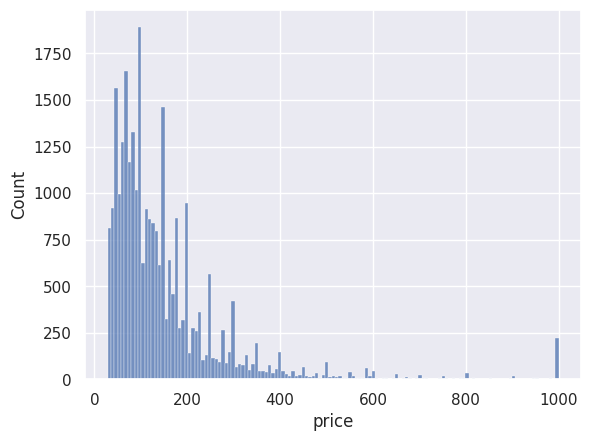

In [9]:
sns.set_theme()
sns.histplot(data=df, x="price")

In [10]:
mean = df['price'].mean()
median = df['price'].median()
skew = df['price'].skew()

print(f"Mean: {mean}, Median: {median}, Skew: {skew}")

Mean: 154.228748840197, Median: 115.0, Skew: 3.1982428479156466


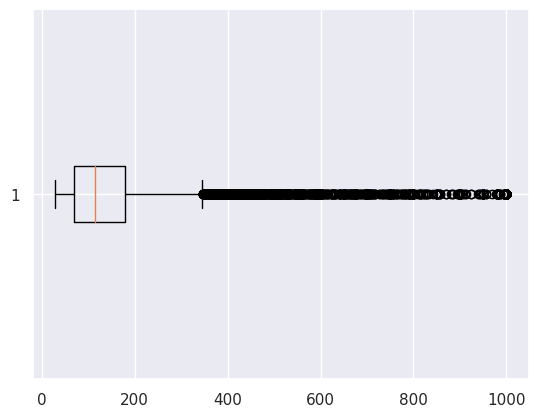

In [11]:
plt.boxplot(df['price'], vert=False)
plt.show()

## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

I noticed that both bedrooms and beds are missing values so I will fill in the missing values with the average of the column. Additionally I will have to remove features that may be based on data available after the home listing such as reviews and availability of the listing in order to prevent feature leakage. 

Additionally I will have to one hot encode categorical columns such as neighborhood group, and room type.

The models that I plan to test are Linear Regression, Gradient Boosted Decision Trees, and Random Forest. I plan to use grid search and k fold cross validation to find optimal hyperparemeters for these models. The performance metrics used will be r2 and RMSE. 

## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [39]:
# YOUR CODE HERE
import json
import scipy.stats as stats
from sklearn.model_selection import cross_val_score
from sklearn.compose import TransformedTargetRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import PredictionErrorDisplay

<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

In [13]:
# YOUR CODE HERE

### Fill empty data

Replace all empty values in bathrooms and bedrooms with the mode of those columns

In [14]:
mode_beds = df['beds'].mode().iloc[0]
print(f"Mode Beds: {mode_beds}")
mode_bedrooms = df['bedrooms'].mode().iloc[0]
print(f"Mode Bedrooms: {mode_bedrooms}")
df['beds'].fillna(value=mode_beds, axis=0, inplace=True)
df['bedrooms'].fillna(value=mode_bedrooms, axis=0, inplace=True)

Mode Beds: 1.0
Mode Bedrooms: 1.0


In [15]:
display(np.sum(df['beds'].isnull(), axis=0))
display(np.sum(df['bedrooms'].isnull(), axis=0))

0

0

### One Hot Encode Categorical columns

Parse Amenities column and get the top 30 amenities and add them to the df

In [16]:
df_amenities_parsed = df['amenities'].apply(json.loads)
exploded = df_amenities_parsed.explode()
top_30_amenities = list(exploded.value_counts().head(30).index)
top_30_amenities

['Wifi',
 'Essentials',
 'Long term stays allowed',
 'Smoke alarm',
 'Heating',
 'Kitchen',
 'Air conditioning',
 'Hangers',
 'Carbon monoxide alarm',
 'Hair dryer',
 'Iron',
 'Hot water',
 'Shampoo',
 'Dedicated workspace',
 'Dishes and silverware',
 'Refrigerator',
 'Cooking basics',
 'Microwave',
 'TV',
 'Free street parking',
 'Fire extinguisher',
 'Coffee maker',
 'Bed linens',
 'Stove',
 'Oven',
 'First aid kit',
 'Washer',
 'Dryer',
 'Extra pillows and blankets',
 'Private entrance']

In [17]:
#add amenity count as a feature
df_amenities_parsed = df_amenities_parsed.apply(set)
df['amenity_num'] = df_amenities_parsed.apply(len)
df['amenity_num']

0        31
1        35
2        14
3        25
4        16
         ..
28017    31
28018     8
28019    15
28020    40
28021    14
Name: amenity_num, Length: 28022, dtype: int64

In [18]:
df_amenities_parsed = df_amenities_parsed.apply(set)
amenities_list = []

for value in top_30_amenities:
    col_name = 'amenity_' + value
    amenities_list.append(col_name)
    df[col_name] = df_amenities_parsed.apply(lambda x: 1 if value in x else 0)
    
df[amenities_list]

,amenity_Wifi,amenity_Essentials,amenity_Long term stays allowed,amenity_Smoke alarm,amenity_Heating,amenity_Kitchen,amenity_Air conditioning,amenity_Hangers,amenity_Carbon monoxide alarm,amenity_Hair dryer,...,amenity_Fire extinguisher,amenity_Coffee maker,amenity_Bed linens,amenity_Stove,amenity_Oven,amenity_First aid kit,amenity_Washer,amenity_Dryer,amenity_Extra pillows and blankets,amenity_Private entrance
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0,0,0,1,0
1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0,0,0,1,0
2,1,0,1,1,1,1,1,0,1,0,...,0,0,0,0,0,0,1,1,0,0
3,1,1,0,1,1,0,1,1,0,1,...,0,0,1,0,0,0,0,0,1,0
4,1,1,0,1,1,0,1,0,1,1,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28017,1,1,1,1,1,1,1,1,1,1,...,1,0,0,1,1,1,0,0,0,0
28018,1,0,0,1,0,1,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
28019,1,1,0,1,0,1,1,1,1,0,...,1,0,0,0,0,0,0,0,0,0
28020,1,1,1,1,1,1,1,1,1,1,...,0,1,1,1,0,1,0,0,0,1


Neighborhood:

In [19]:
df.select_dtypes(include=['object']).columns

Index(['name', 'description', 'neighborhood_overview', 'host_name',
       'host_location', 'host_about', 'neighbourhood_group_cleansed',
       'room_type', 'amenities'],
      dtype='object')

In [20]:
#encode neighborhood
df['neighbourhood_group_cleansed'].unique()

array(['Manhattan', 'Brooklyn', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [21]:
df_Neighbourhood = pd.get_dummies(df['neighbourhood_group_cleansed'], prefix='neighbourhood_')
df_Neighbourhood

,neighbourhood__Bronx,neighbourhood__Brooklyn,neighbourhood__Manhattan,neighbourhood__Queens,neighbourhood__Staten Island
0,0,0,1,0,0
1,0,1,0,0,0
2,0,1,0,0,0
3,0,0,1,0,0
4,0,0,1,0,0
...,...,...,...,...,...
28017,0,0,0,1,0
28018,0,1,0,0,0
28019,0,1,0,0,0
28020,0,1,0,0,0


In [22]:
df = df.join(df_Neighbourhood)
df.drop(columns=['neighbourhood_group_cleansed'], inplace=True)
df.columns

Index(['name', 'description', 'neighborhood_overview', 'host_name',
       'host_location', 'host_about', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_listings_count',
       'host_total_listings_count', 'host_has_profile_pic',
       'host_identity_verified', 'room_type', 'accommodates', 'bathrooms',
       'bedrooms', 'beds', 'amenities', 'price', 'minimum_nights',
       'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'number_of_reviews_ltm',
       'number_of_reviews_l30d', 'review_scores_rating',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable',
       'cal

Room Type:

In [23]:
df['room_type'].unique()

array(['Entire home/apt', 'Private room', 'Hotel room', 'Shared room'],
      dtype=object)

In [24]:
df_Room = pd.get_dummies(df['room_type'], prefix='type_')
df_Room

,type__Entire home/apt,type__Hotel room,type__Private room,type__Shared room
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,0,0,1,0
4,0,0,1,0
...,...,...,...,...
28017,0,0,1,0
28018,1,0,0,0
28019,0,0,1,0
28020,1,0,0,0


In [25]:
df = df.join(df_Room)
df.drop(columns=['room_type'], inplace=True)
df.columns

Index(['name', 'description', 'neighborhood_overview', 'host_name',
       'host_location', 'host_about', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_listings_count',
       'host_total_listings_count', 'host_has_profile_pic',
       'host_identity_verified', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'amenities', 'price', 'minimum_nights', 'maximum_nights',
       'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'number_of_reviews_ltm',
       'number_of_reviews_l30d', 'review_scores_rating',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable',
       'calculated_host_

In [26]:
df.shape

(28022, 88)

### Test Models

#### Linear Regression

In [27]:
features = ['accommodates', 'bathrooms', 'bedrooms', 'beds', 'minimum_nights', 'maximum_nights', 'instant_bookable',
            'neighbourhood__Bronx', 'neighbourhood__Brooklyn', 'neighbourhood__Manhattan', 'neighbourhood__Queens', 'neighbourhood__Staten Island',
            'type__Entire home/apt', 'type__Hotel room', 'type__Private room', 'type__Shared room', 'amenity_num']

features.extend(amenities_list)

X = df[features]
y = df['price']
display(X)
display(y)

,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,instant_bookable,neighbourhood__Bronx,neighbourhood__Brooklyn,neighbourhood__Manhattan,...,amenity_Fire extinguisher,amenity_Coffee maker,amenity_Bed linens,amenity_Stove,amenity_Oven,amenity_First aid kit,amenity_Washer,amenity_Dryer,amenity_Extra pillows and blankets,amenity_Private entrance
0,1,1.0,1.0,1.0,30,1125,False,0,0,1,...,1,1,1,1,1,0,0,0,1,0
1,3,1.0,1.0,3.0,1,730,False,0,1,0,...,1,1,1,1,1,0,0,0,1,0
2,4,1.5,2.0,2.0,5,1125,False,0,1,0,...,0,0,0,0,0,0,1,1,0,0
3,2,1.0,1.0,1.0,2,14,False,0,0,1,...,0,0,1,0,0,0,0,0,1,0
4,1,1.0,1.0,1.0,2,14,False,0,0,1,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28017,2,1.0,1.0,1.0,1,365,True,0,0,0,...,1,0,0,1,1,1,0,0,0,0
28018,6,1.0,2.0,2.0,1,1,False,0,1,0,...,0,0,0,0,0,0,1,0,0,0
28019,2,2.0,1.0,1.0,1,10,True,0,1,0,...,1,0,0,0,0,0,0,0,0,0
28020,3,1.0,1.0,2.0,7,365,False,0,1,0,...,0,1,1,1,0,1,0,0,0,1


0         150.0
1          75.0
2         275.0
3          68.0
4          75.0
          ...  
28017      89.0
28018    1000.0
28019      64.0
28020      84.0
28021      70.0
Name: price, Length: 28022, dtype: float64

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [29]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_prediction = lr.predict(X_test)

In [30]:
print('Model Summary:\n')

print('Intercept:')
print('alpha = ' , lr.intercept_)

print('\nWeights:')
i = 0
for w in lr.coef_:
    print('w_',i+1,'= ', w, ' [ weight of', features[i],']')
    i += 1

Model Summary:

Intercept:
alpha =  26.792415807248375

Weights:
w_ 1 =  23.98302206765831  [ weight of accommodates ]
w_ 2 =  52.626677293962054  [ weight of bathrooms ]
w_ 3 =  30.220482521425588  [ weight of bedrooms ]
w_ 4 =  -7.518208998429679  [ weight of beds ]
w_ 5 =  -0.3292190530170111  [ weight of minimum_nights ]
w_ 6 =  1.0005757614728976e-08  [ weight of maximum_nights ]
w_ 7 =  7.7424020424781395  [ weight of instant_bookable ]
w_ 8 =  -18.764473841371654  [ weight of neighbourhood__Bronx ]
w_ 9 =  4.888415416224877  [ weight of neighbourhood__Brooklyn ]
w_ 10 =  57.565576012116956  [ weight of neighbourhood__Manhattan ]
w_ 11 =  -11.099560239139462  [ weight of neighbourhood__Queens ]
w_ 12 =  -32.58995734788386  [ weight of neighbourhood__Staten Island ]
w_ 13 =  -22.8689132567514  [ weight of type__Entire home/apt ]
w_ 14 =  151.6196597189293  [ weight of type__Hotel room ]
w_ 15 =  -65.27418512263452  [ weight of type__Private room ]
w_ 16 =  -63.47656134127384  [ we

We can see that certain neighborhoods cause price to increase more than other such as Manhattan causing a steeper increase in price compared to Brooklyn. Additionally some neighborhoods cause houses to be cheaper such as Staten Island. Additionally we can see Hotel Rooms are a big contributing factor to price being high compared to other room types

In [31]:
print('\nModel Performance\n\nRMSE =   %.2f' % np.sqrt(mean_squared_error(y_test, lr_prediction)))
print(' R^2 =   %.2f' % r2_score(y_test, lr_prediction))


Model Performance

RMSE =   101.67
 R^2 =   0.44


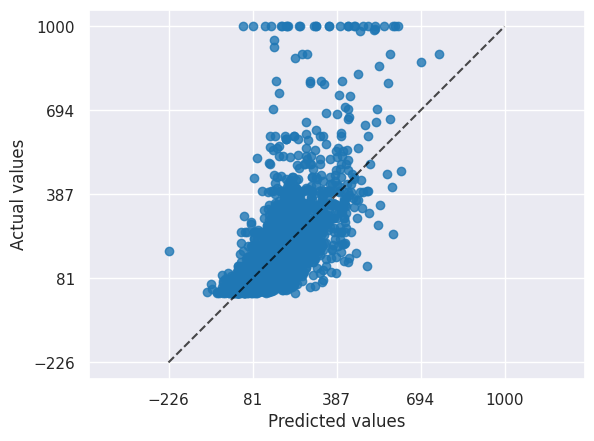

In [32]:
lr_display = PredictionErrorDisplay(y_true=y_test, y_pred=lr_prediction)
lr_display.plot(kind="actual_vs_predicted")
plt.show()

On average predictions were off by $101. Additionally this model represents 44% of the variation in the data set which could be improved by using different models.

Let's try improving this score by applying a square root transformation to the target.

<AxesSubplot: xlabel='price', ylabel='Count'>

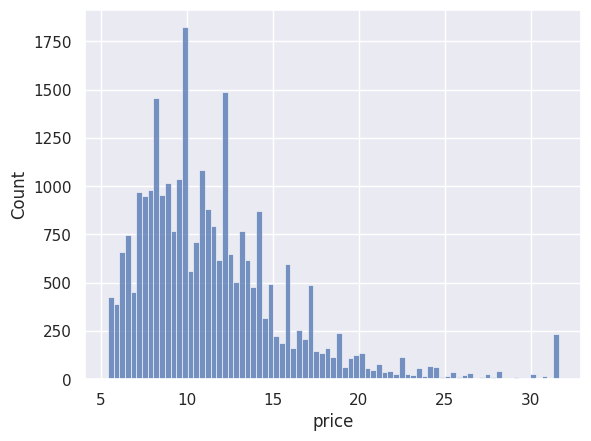

In [33]:
df_price_log = np.sqrt(df['price'])

sns.histplot(data=df_price_log)

In [34]:
lr_tt = TransformedTargetRegressor(regressor=LinearRegression(), func=np.sqrt, inverse_func=np.square)
lr_tt.fit(X_train, y_train)
lr_log = lr_tt.regressor_
lr_tt_pred = lr_tt.predict(X_test)

In [35]:
print('Model Summary:\n')

print('Intercept:')
print('alpha = ' , lr_log.intercept_)

print('\nWeights:')
i = 0
for w in lr_log.coef_:
    print('w_',i+1,'= ', w, ' [ weight of', features[i],']')
    i += 1

Model Summary:

Intercept:
alpha =  7.35049905457394

Weights:
w_ 1 =  0.7344140716078592  [ weight of accommodates ]
w_ 2 =  1.0835021533627158  [ weight of bathrooms ]
w_ 3 =  0.9331877181943758  [ weight of bedrooms ]
w_ 4 =  -0.1946067465314673  [ weight of beds ]
w_ 5 =  -0.012454579199840403  [ weight of minimum_nights ]
w_ 6 =  4.980951079306976e-10  [ weight of maximum_nights ]
w_ 7 =  0.29105954216794494  [ weight of instant_bookable ]
w_ 8 =  -0.7733116982092527  [ weight of neighbourhood__Bronx ]
w_ 9 =  0.26194645853917187  [ weight of neighbourhood__Brooklyn ]
w_ 10 =  2.1000776722776844  [ weight of neighbourhood__Manhattan ]
w_ 11 =  -0.4269996390889852  [ weight of neighbourhood__Queens ]
w_ 12 =  -1.161712793520203  [ weight of neighbourhood__Staten Island ]
w_ 13 =  0.24896505777539313  [ weight of type__Entire home/apt ]
w_ 14 =  4.414742478969134  [ weight of type__Hotel room ]
w_ 15 =  -2.0605329131069983  [ weight of type__Private room ]
w_ 16 =  -2.60317462368917

In [36]:
print('\nModel Performance\n\nRMSE =   %.2f' % np.sqrt(mean_squared_error(y_test, lr_tt_pred)))
print(' R^2 =   %.2f' % r2_score(y_test, lr_tt_pred))


Model Performance

RMSE =   100.19
 R^2 =   0.45


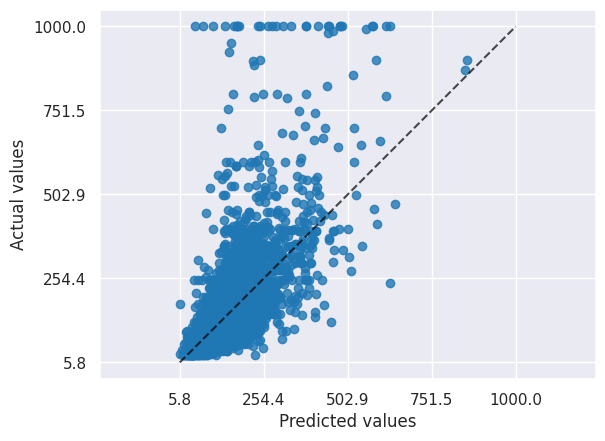

In [37]:
lr_tt_display = PredictionErrorDisplay(y_true=y_test, y_pred=lr_tt_pred)
lr_tt_display.plot(kind="actual_vs_predicted")
plt.show()

As we can see, applying a sqrt function to the target when training helped increase the r2 score by 1 percent.

#### Gradient Boosted Decision Tree

In [42]:
gbdt = GradientBoostingRegressor(n_estimators=1000, n_iter_no_change=10, random_state=42)

gbdt_param_grid = {
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5]
}

grid = GridSearchCV(gbdt, gbdt_param_grid, cv=3)

gbdt_grid_search = grid.fit(X_train, y_train)

In [43]:
gbdt_best_params = gbdt_grid_search.best_params_
best_n_estimator = gbdt_grid_search.best_estimator_.n_estimators_
best_learning_rate = gbdt_best_params['learning_rate']
best_max_depth = gbdt_best_params['max_depth']
for feature in gbdt_best_params:
    print(f"{feature} : {gbdt_best_params[feature]}")
print(f"best_n_estimator : {best_n_estimator}")

learning_rate : 0.05
max_depth : 5
best_n_estimator : 206


In [44]:
gbdt_best = GradientBoostingRegressor(learning_rate=best_learning_rate, max_depth=best_max_depth, n_estimators=best_n_estimator)
gbdt_best.fit(X_train, y_train)
gbdt_prediction = gbdt_best.predict(X_test)

In [45]:
print('\nModel Performance\n\nRMSE =   %.2f' % np.sqrt(mean_squared_error(y_test, gbdt_prediction)))
print(' R^2 =   %.2f' % r2_score(y_test, gbdt_prediction))


Model Performance

RMSE =   91.17
 R^2 =   0.55


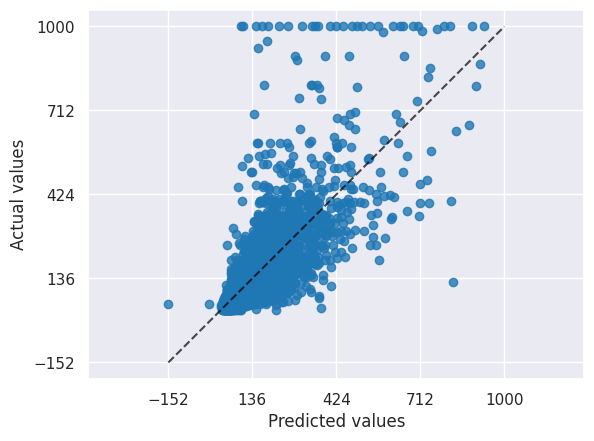

In [46]:
gbdt_display = PredictionErrorDisplay(y_true=y_test, y_pred=gbdt_prediction)
gbdt_display.plot(kind="actual_vs_predicted")
plt.show()

Using Gradient Boosted Decision Trees offered a significant performance boost compared to linear regression. On average prices were off by $91 and represented 55% of the variation in the dataset. While this is a good start 45% of the data remains unrepresented by the model due to noise and a lack of features such as proximity to attractions or date. 

#### Random Forest Regressor

In [48]:
rf = RandomForestRegressor()

rf_param_grid = {'n_estimators' : [100, 200, 300]}

grid = GridSearchCV(rf, rf_param_grid, cv=3)

rf_grid_search = grid.fit(X_train, y_train)

In [49]:
rf_best_params = rf_grid_search.best_params_
best_n_estimator = rf_best_params['n_estimators']
print(f"best_n_estimator : {best_n_estimator}")

best_n_estimator : 300


In [50]:
rf_best = RandomForestRegressor(n_estimators=best_n_estimator)
rf_best.fit(X_train, y_train)
rf_prediction = rf_best.predict(X_test)

In [51]:
print('\nModel Performance\n\nRMSE =   %.2f' % np.sqrt(mean_squared_error(y_test, rf_prediction)))
print(' R^2 =   %.2f' % r2_score(y_test, rf_prediction))


Model Performance

RMSE =   89.85
 R^2 =   0.56


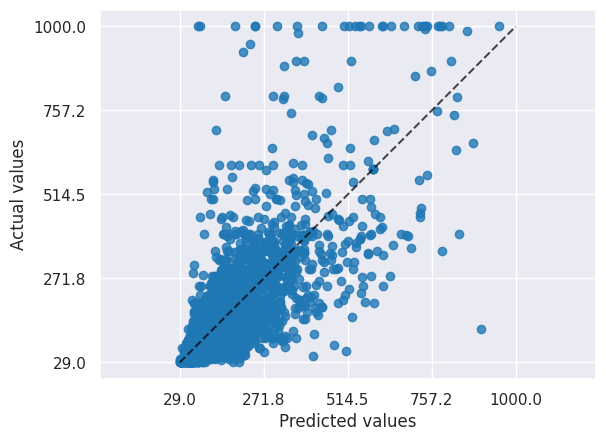

In [52]:
gbdt_display = PredictionErrorDisplay(y_true=y_test, y_pred=rf_prediction)
gbdt_display.plot(kind="actual_vs_predicted")
plt.show()

### Conclusion

Out of the three models tested Random Forest had the best r2 score with the model representing 56% of the variation in the data set. While this is a good starting point for us, it is not the best and should not be used in an industry setting where high accuracy is extremely important. However, this model should suffice for giving very general predictions of an on-market listing price for an AirBnb rental.

The low accuracy of the models can be attributed to multiple factors. For one, many features such as Availability and Reviews could not be used to train the model as they would result in feature leakage. Despite their high correlation with price those features would not be available to the landlord at the time of prediction and are oftentimes captured after listing the property. 

Additionally, a lack of strong predictive features also contributed to the low accuracy. If we were provided features such date of listing and longitude and latitude we may be able to more accurately capture the complexities of price changes during different seasons of the year and different locations within a city.

All three models generally did a poor job prediciting high price properties possibly due to features not correlating strongly with luxury pricing.

### Future Considerations

In order to further improve these models some steps can be taken to increase the feature's predicitve power. For example the amenties feature which is currently text data can be grouped using nlp in order to gauge sentiment about certain amenities and give it higher weight. Additionally, It may be worth experimenting with adding more top values from amenities to see how that impacts model accuracy. This may help the models better predict not only normal properties but also luxury properties as luxury properties often rely on more factors than just the basic features of the property such as number of rooms and number of beds. 

Additionally, if the problem statement were changed to dynamically predict pricing using all available data at any time we may be able to create a more accurate model due to having more data to work with as including availability and reviews would no longer be feature leakage. 